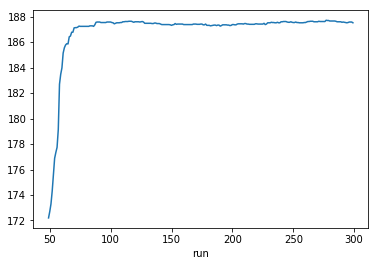

In [12]:
%matplotlib inline

import pandas as pd
import numpy as np
from easymdp3.algorithms.hierarchicalqlearning import HierarchicalQLearner
from easymdp3.domains.taxicab.vis import animate_transitions
from easymdp3.domains.taxicab import simple_getput

np.random.seed(0)

learner = HierarchicalQLearner(simple_getput,
                               learning_rate=.9,
                               discount_rate=.99,
                               initial_qvalue=0)
run_data = learner.train(episodes=300, max_choice_steps=100)
run_data = pd.DataFrame(run_data)
rolling = run_data.groupby('run')['r'].sum().rolling(50)
rolling.mean().plot()

In [10]:
s = learner.ham.get_init_state()
print(learner._qvals(s))
print(learner._completion_qs(s))
print(learner._action_qs(s))
print(learner._external_qs(s))

{('get', (('passenger_i', 0),)): -5.14013372717805, ('get', (('passenger_i', 1),)): 172.93368318533447, ('put', ()): -inf}
{('get', (('passenger_i', 0),)): -3.15013372717805, ('get', (('passenger_i', 1),)): 175.90378318533448, ('put', ()): 0}
{('get', (('passenger_i', 0),)): -1.99, ('get', (('passenger_i', 1),)): -2.9701, ('put', ()): -inf}
{('get', (('passenger_i', 0),)): 0.0, ('get', (('passenger_i', 1),)): 0.0, ('put', ()): 0}


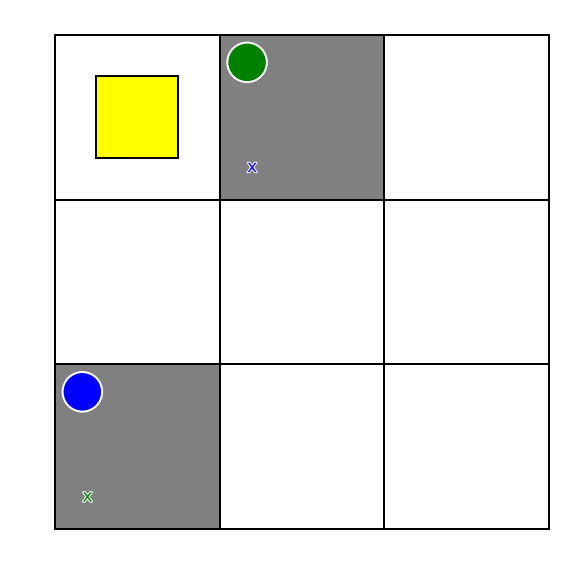

In [11]:
traj = learner.run()
ani = animate_transitions(learner.ham.mdp, traj, 
                          'simple_getput.mp4', 
                          move_interval=750)